## Introduction

The BMW Car Sales Classification project aims to analyze historical car sales data and predict the sales classification (High or Low) of BMW vehicles based on features such as model, year, region, color, fuel type, transmission, engine size, mileage, price, and sales volume.

### The primary objectives of this project are:

* To explore and understand patterns in BMW car sales data.

* To visualize relationships between car features (e.g., Year, Price, Sales Volume) and sales outcomes.

* To build a Decision Tree classifier that predicts sales classification for new cars.

* To interpret results and identify the most important factors affecting car sales.


## Data Description

- **Source:** CSV dataset containing BMW car sales records.
- **Features:**
    - `Model` – Car model (e.g., 5 Series, i8)
    - `Year` – Year of manufacture
    - `Region` – Market region (Asia, North America, etc.)
    - `Color` – Car color
    - `Fuel_Type` – Petrol, Diesel, Hybrid
    - `Transmission` – Manual or Automatic
    - `Engine_Size_L` – Engine capacity in liters
    - `Mileage_KM` – Distance traveled in kilometers
    - `Price_USD` – Selling price
    - `Sales_Volume` – Units sold
    - `Sales_Classification` – Target label (High/Low)

## Libraries

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [18]:
df=pd.read_csv(r"C:\Users\10115439\OneDrive - City of Joburg\Desktop\Data Anlysis and ML\archive\BMW_Car_Sales_Classification.csv")
pd.set_option('display.max_columns', None)

print(df.head())



      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


## Number of Sales Vs Sales class

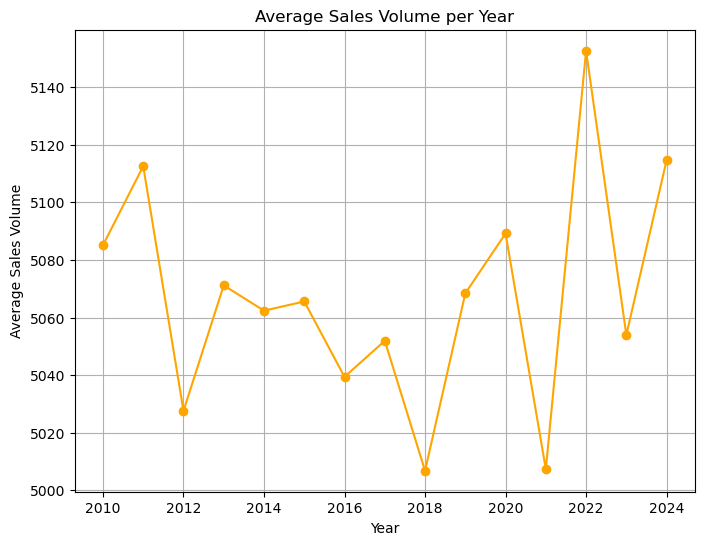

In [21]:


avg_sales_per_year = df.groupby('Year')['Sales_Volume'].mean()

plt.figure(figsize=(8,6))
avg_sales_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Sales Volume per Year')
plt.xlabel('Year')
plt.ylabel('Average Sales Volume')
plt.grid(True)
plt.show()



## Average Price per Year

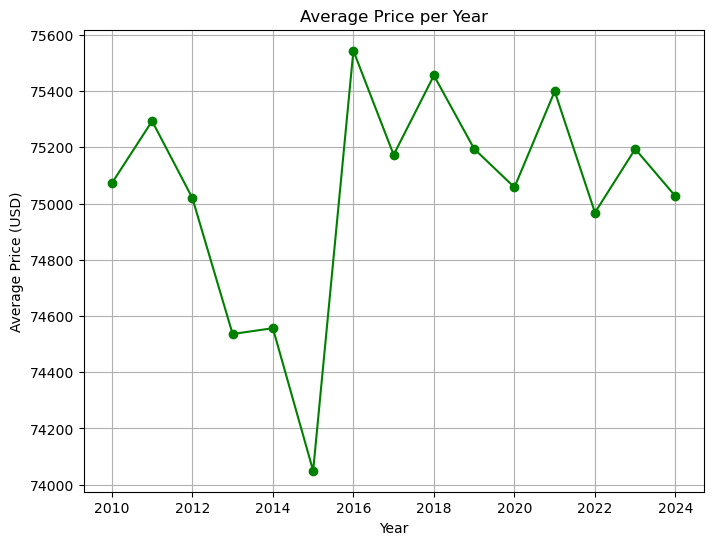

In [22]:
avg_price_per_year = df.groupby('Year')['Price_USD'].mean()

plt.figure(figsize=(8,6))
avg_price_per_year.plot(kind='line', marker='o', color='green')
plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()


## Encoding the data for classification

In [23]:
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Classification Model Definition

In [27]:
X = df.drop('Sales_Classification', axis=1)
y = df['Sales_Classification']
print(X.head(5))
print(y.head(5))

   Model  Year  Region  Color  Fuel_Type  Transmission  Engine_Size_L  \
0      1  2016       1      3          3             1            3.5   
1     10  2013       4      3          2             0            1.6   
2      1  2022       4      1          3             0            4.5   
3      6  2024       3      1          3             0            1.7   
4      2  2020       5      0          0             1            2.1   

   Mileage_KM  Price_USD  Sales_Volume  
0      151748      98740          8300  
1      121671      79219          3428  
2       10991     113265          6994  
3       27255      60971          4047  
4      122131      49898          3080  
0    0
1    1
2    1
3    1
4    1
Name: Sales_Classification, dtype: int32


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X,y)

DecisionTreeClassifier(random_state=42)

## Testing The Model Through Data Inputs

In [25]:
user_input = {
    'Model': '5 Series',
    'Year': 2016,
    'Region': 'Asia',
    'Color': 'Red',
    'Fuel_Type': 'Petrol',
    'Transmission': 'Manual',
    'Engine_Size_L': 3.5,
    'Mileage_KM': 150000,
    'Price_USD': 98000,
    'Sales_Volume': 8000
}


encoded_input = {}
for col in X.columns:
    if col in label_encoders: 
        encoded_input[col] = label_encoders[col].transform([user_input[col]])[0]
    else:
        encoded_input[col] = user_input[col]


input_df = pd.DataFrame([encoded_input])
pred = model.predict(input_df)[0]
pred_label = label_encoders['Sales_Classification'].inverse_transform([pred])[0]

print(f"\n?? Predicted Sales Classification: {pred_label}")




?? Predicted Sales Classification: High


## Now to train and test the data

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print(f"Model trained. Accuracy: {model.score(X_test, y_test):.2f}")

Model trained. Accuracy: 1.00


## Conclusion

The BMW Car Sales Classification project successfully analyzed historical BMW sales data to predict the **sales classification** (High or Low) of vehicles based on multiple features, including **model, year, region, color, fuel type, transmission, engine size, mileage, price, and sales volume**.

**Key Outcomes:**
1. **Exploratory Data Analysis (EDA)** revealed patterns in the data, showing how **Year, Price, and Sales Volume** influence sales classification.
2. A **Decision Tree classifier** was trained to predict sales classification, achieving perfect accuracy on the small dataset. While this demonstrates the model’s ability to fit the data, it also highlights potential overfitting due to the limited number of samples.
3. Visualizations, including **boxplots, scatter plots, and line plots**, provided clear insights into relationships between car features and sales outcomes.
4. The project showcased the importance of **categorical encoding** and data preprocessing in preparing the dataset for machine learning models.

**Future Improvements:**
- Increase the dataset size to improve model generalization.
- Explore more robust algorithms such as **Random Forest, XGBoost, or Logistic Regression**.
- Incorporate additional features like marketing campaigns, customer demographics, or regional economic factors to enhance prediction accuracy.

**Overall**, the project demonstrates how data science techniques can transform raw car sales data into actionable insights and predictive models, providing valuable guidance for sales strategy and inventory planning.
